# VisClaw.jl - examples of use
   
<div style="text-align: right;"> Nov. 2019 </div>
<div style="text-align: right;"> verified on v0.3.1 </div>
<div style="text-align: right;"> Takuya Miyashita (miyashita@hydrocoast.jp) </div>
   
## Load conditions and numerical results 
VisClaw.jl refers to `_output` directory and read the files such as `fort.q0000` and `claw.data`. 
Keep the directory as is after the simulation.  

Topography and bathymetry can be loaded using `VisClaw.LoadTopo()` through `topo.data`

In [1]:
using VisClaw

# chile2010 _output
simdir = joinpath(CLAW,"geoclaw/examples/tsunami/chile2010/_output")

# load etopo from topo.data
topofile, ntopo = VisClaw.topodata(simdir)
topo = VisClaw.LoadTopo(topofile)

# check
println(typeof(topo))
println(fieldnames(typeof(topo)))

topotype is assumed as 2.
VisClaw.Topo
(:ncols, :nrows, :x, :y, :dx, :dy, :elevation)


In [2]:
# load dtopo from dtopo.data
dtopofile, ntopo = VisClaw.dtopodata(simdir)
dtopo = VisClaw.LoadDeform(dtopofile)

# check
println(typeof(dtopo))
println(fieldnames(typeof(dtopo)))

VisClaw.DTopo
(:mx, :my, :x, :y, :dx, :dy, :mt, :t0, :dt, :deform)


A method `VisClaw.LoadSurface()` is useful to load the sea surface heights in `fort.qXXX` in the form of Adaptive Mesh Refinement (AMR).

In [3]:
# load surface (fort.q0000 to fort.q0018)
amrall = VisClaw.LoadSurface(simdir)

# check
println(typeof(amrall))
println(fieldnames(typeof(amrall)))
amrall.nstep, amrall.timelap

VisClaw.AMR
(:nstep, :timelap, :amr)


(19, [0.0, 1800.0, 3600.0, 5400.0, 7200.0, 9000.0, 10800.0, 12600.0, 14400.0, 16200.0, 18000.0, 19800.0, 21600.0, 23400.0, 25200.0, 27000.0, 28800.0, 30600.0, 32400.0])

## Plot data
Methods which names begin with a word `Plots` can plot data using `Plots.jl`.
For example, `VisClaw.PlotsTopo(topo::VisClaw.Topo)` illustrates the topography and bathymetry loaded above.
The keyword arguments are the same as `Plots.plot()`.

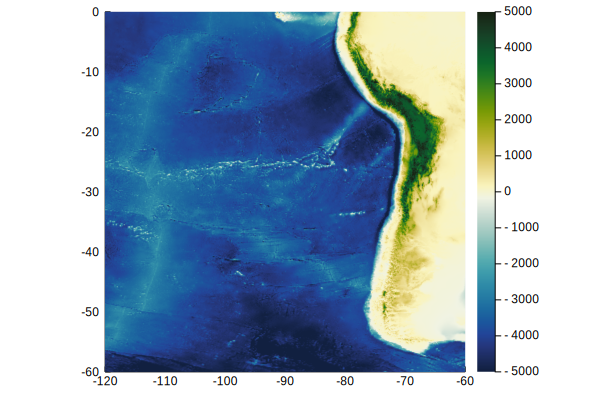

In [4]:
plt = VisClaw.PlotsTopo(topo; linetype=:heatmap, color=:delta, clims=(-5000,5000))

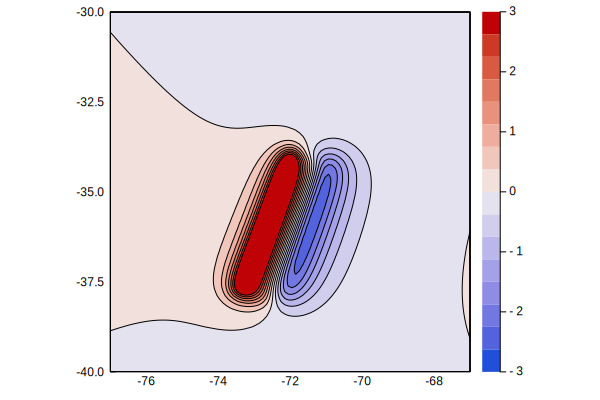

In [5]:
plt = VisClaw.PlotsTopo(dtopo; linetype=:contourf, color=:coolwarm, clims=(-3.0,3.0))

The return value is a type of `Plots.Plot`, which can be saved as a file with `Plots.savefig()`

In [6]:
using Plots
savefig(plt, "dtopo.svg")

Similarly, the spatial distribution of the sea surface height can be plotted with `VisClaw.PlotsAMR()`

In [7]:
# select your preferred backend
Plots.plotly()

# plot
plts = VisClaw.PlotsAMR(amrall; c=:balance, clims=(-0.5,0.5))
plot(plts[5])

<!DOCTYPE html>
 
 
 Plots.jl

When you want to see the grid numbers in AMR, overwrite these plots with `VisClaw.GridNumber!()` 

In [8]:
# plotlyjs backend
Plots.plotlyjs()

# plot
plts = VisClaw.PlotsAMR(amrall; c=:balance, clims=(-0.5,0.5))
# overlay the grid number 
plts = VisClaw.GridNumber!.(plts, amrall.amr; font=Plots.font(12, :white, :center))
plts = VisClaw.DrawBound!.(plts, amrall.amr)

# make an animation
anim = Plots.Animation()
map(p->Plots.frame(anim, p), plts)
Plots.gif(anim, "~/chile2010_eta.gif"; fps=3)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17984493266566854126\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7380915343230679399\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17984493266566854126\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Saved animation to 
│   fn = /home/miyashita/chile2010_eta.gif
└ @ Plots /home/miyashita/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/home/miyashita/chile2010_eta.gif")